# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Import label encoder
from sklearn import preprocessing

# Import Dataset

In [2]:
data = pd.read_csv('data/cleaned_data.csv')

In [3]:
data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             529 non-null    int64  
 1    Age (yrs)             529 non-null    int64  
 2   Weight (Kg)            529 non-null    float64
 3   Height(Cm)             529 non-null    float64
 4   BMI                    529 non-null    float64
 5   Blood Group            529 non-null    int64  
 6   Pulse rate(bpm)        529 non-null    int64  
 7   RR (breaths/min)       529 non-null    int64  
 8   Hb(g/dl)               529 non-null    float64
 9   Cycle(R/I)             529 non-null    int64  
 10  Cycle length(days)     529 non-null    int64  
 11  Marraige Status (Yrs)  529 non-null    float64
 12  Pregnant(Y/N)          529 non-null    int64  
 13  No. of aborptions      529 non-null    int64  
 14  FSH(mIU/mL)            529 non-null    float64
 15  LH(mIU

In [5]:
print(data.shape)

(529, 38)


In [7]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,...,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000,529.000000
mean,0.325142,31.406427,59.670132,156.436476,24.338638,13.797732,73.478261,19.241966,11.158563,2.557656,...,0.485822,0.514178,0.241966,114.801512,77.088847,6.105860,6.659735,15.018526,15.452495,8.494272
std,0.468871,5.443515,11.100514,6.021679,4.082604,1.847068,2.705914,1.697273,0.864174,0.900853,...,0.500272,0.500272,0.428679,5.935920,4.710728,4.222072,4.446388,3.585022,3.338548,2.167970
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,70.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,52.000000,152.000000,21.833562,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.300000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.700000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


# Dropping irrelevant freatures

In [9]:
data.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
Hip(inch)                0
Waist(inch)              0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
Avg. F size (L) (mm)     0
Avg. F size (R) (mm)     0
E

In [11]:
data.nunique()

PCOS (Y/N)                 2
 Age (yrs)                29
Weight (Kg)              116
Height(Cm)                49
BMI                      349
Blood Group                8
Pulse rate(bpm)            9
RR (breaths/min)           8
Hb(g/dl)                  46
Cycle(R/I)                 3
Cycle length(days)        12
Marraige Status (Yrs)     34
Pregnant(Y/N)              2
No. of aborptions          6
FSH(mIU/mL)              365
LH(mIU/mL)               338
Hip(inch)                 19
Waist(inch)               23
TSH (mIU/L)              306
AMH(ng/mL)               294
PRL(ng/mL)               473
Vit D3 (ng/mL)           327
PRG(ng/mL)                89
RBS(mg/dl)                55
Weight gain(Y/N)           2
hair growth(Y/N)           2
Skin darkening (Y/N)       2
Hair loss(Y/N)             2
Pimples(Y/N)               2
Fast food (Y/N)            2
Reg.Exercise(Y/N)          2
BP _Systolic (mmHg)        5
BP _Diastolic (mmHg)       4
Follicle No. (L)          21
Follicle No. (

In [33]:
data = data.drop(['Pregnant(Y/N)','PCOS (Y/N)','Weight gain(Y/N)','hair growth(Y/N)','Skin darkening (Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)','Fast food (Y/N)','Reg.Exercise(Y/N)'],axis=1)
data.head()


,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,...,17.1,0.57,92.0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,...,61.3,0.97,92.0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,...,49.7,0.36,84.0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,...,33.4,0.36,76.0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,...,43.8,0.38,84.0,120,80,3,4,16.0,14.0,7.0


# EDA

In [34]:
print(data.shape)

(529, 29)


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    Age (yrs)             529 non-null    int64  
 1   Weight (Kg)            529 non-null    float64
 2   Height(Cm)             529 non-null    float64
 3   BMI                    529 non-null    float64
 4   Blood Group            529 non-null    int64  
 5   Pulse rate(bpm)        529 non-null    int64  
 6   RR (breaths/min)       529 non-null    int64  
 7   Hb(g/dl)               529 non-null    float64
 8   Cycle(R/I)             529 non-null    int64  
 9   Cycle length(days)     529 non-null    int64  
 10  Marraige Status (Yrs)  529 non-null    float64
 11  No. of aborptions      529 non-null    int64  
 12  FSH(mIU/mL)            529 non-null    float64
 13  LH(mIU/mL)             529 non-null    float64
 14  Hip(inch)              529 non-null    int64  
 15  Waist(

In [36]:
data.describe().round(2)

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00,...,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00
mean,31.41,59.67,156.44,24.34,13.80,73.48,19.24,11.16,2.56,4.94,...,28.95,0.62,99.87,114.80,77.09,6.11,6.66,15.02,15.45,8.49
std,5.44,11.10,6.02,4.08,1.85,2.71,1.70,0.86,0.90,1.50,...,12.57,3.85,18.72,5.94,4.71,4.22,4.45,3.59,3.34,2.17
min,20.00,31.00,137.00,12.42,11.00,70.00,16.00,8.50,2.00,0.00,...,6.08,0.05,60.00,100.00,60.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,52.00,152.00,21.83,13.00,72.00,18.00,10.50,2.00,5.00,...,20.70,0.25,92.00,110.00,70.00,3.00,3.00,13.00,13.00,7.00
50%,31.00,59.00,156.00,24.30,14.00,72.00,18.00,11.00,2.00,5.00,...,25.90,0.32,100.00,110.00,80.00,5.00,6.00,15.00,16.00,8.50
75%,35.00,65.00,160.00,26.70,15.00,74.00,20.00,11.70,4.00,5.00,...,34.40,0.46,107.00,120.00,80.00,9.00,10.00,18.00,18.00,9.80
max,48.00,108.00,180.00,38.90,18.00,82.00,28.00,14.80,5.00,12.00,...,90.00,85.00,350.00,140.00,100.00,22.00,20.00,24.00,24.00,18.00


array([[<AxesSubplot:title={'center':' Age (yrs)'}>,
        <AxesSubplot:title={'center':'Weight (Kg)'}>,
        <AxesSubplot:title={'center':'Height(Cm) '}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Blood Group'}>],
       [<AxesSubplot:title={'center':'Pulse rate(bpm) '}>,
        <AxesSubplot:title={'center':'RR (breaths/min)'}>,
        <AxesSubplot:title={'center':'Hb(g/dl)'}>,
        <AxesSubplot:title={'center':'Cycle(R/I)'}>,
        <AxesSubplot:title={'center':'Cycle length(days)'}>],
       [<AxesSubplot:title={'center':'Marraige Status (Yrs)'}>,
        <AxesSubplot:title={'center':'No. of aborptions'}>,
        <AxesSubplot:title={'center':'FSH(mIU/mL)'}>,
        <AxesSubplot:title={'center':'LH(mIU/mL)'}>,
        <AxesSubplot:title={'center':'Hip(inch)'}>],
       [<AxesSubplot:title={'center':'Waist(inch)'}>,
        <AxesSubplot:title={'center':'TSH (mIU/L)'}>,
        <AxesSubplot:title={'center':'AMH(ng/mL)'}>,
        <

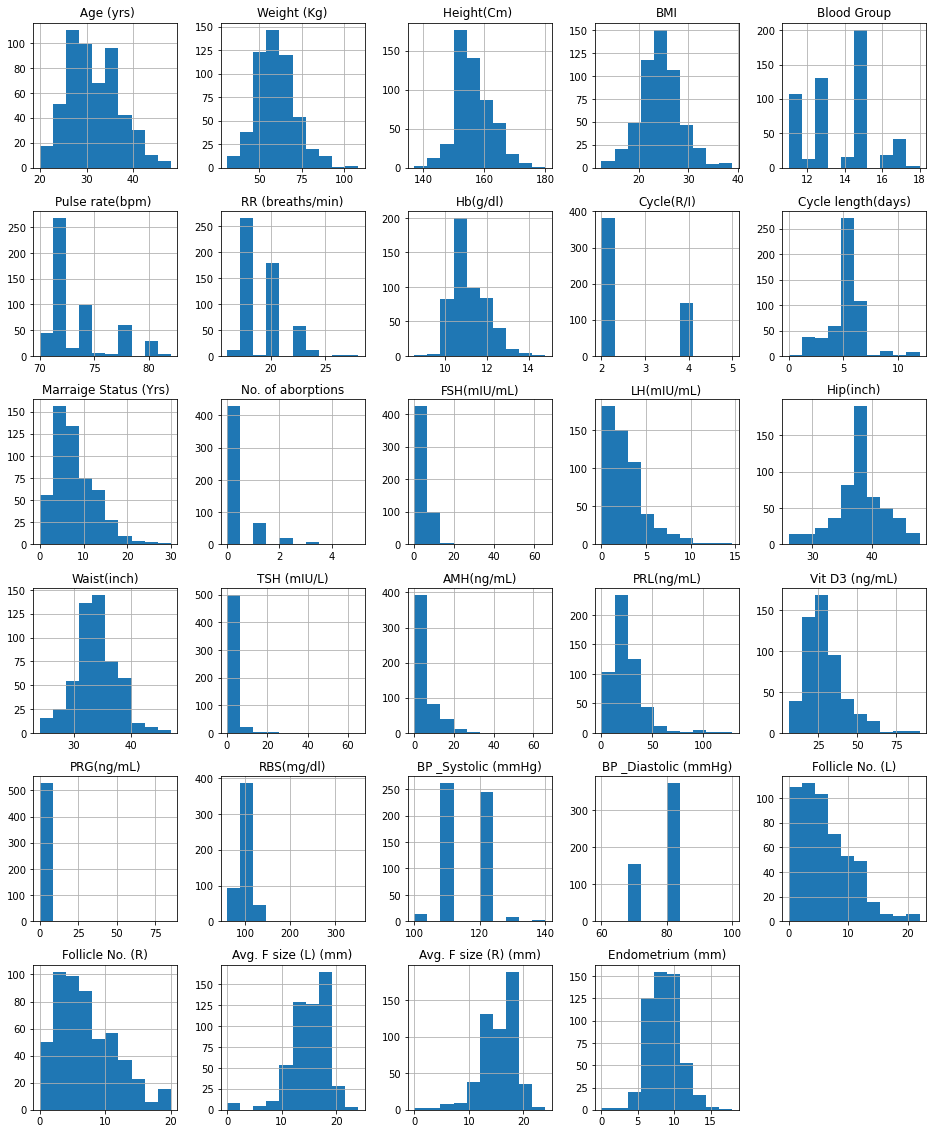

In [37]:
data.hist(figsize=(16,20))

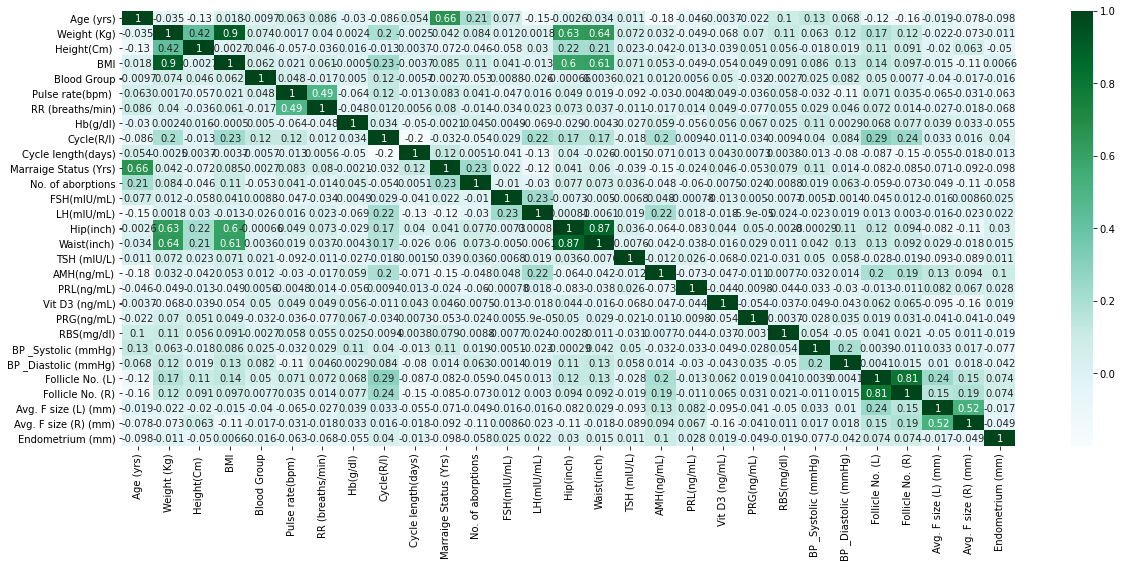

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), annot=True,cmap='BuGn')
plt.show()

In [23]:
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/cleaned_data1.csv")


In [46]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"].values

Visualizing on noarmal dataset

In [25]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

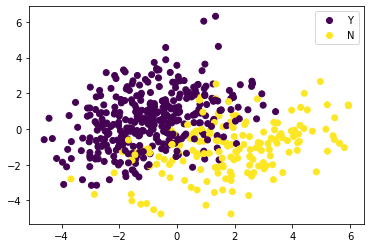

In [58]:
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0],labels=list("YN"))

# Null Values

In [12]:
data.isnull().sum()

 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
Hip(inch)                0
Waist(inch)              0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
Avg. F size (L) (mm)     0
Avg. F size (R) (mm)     0
Endometrium (mm)         0
dtype: int64

In [13]:
data = data.dropna()
data.isnull().sum()

 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
Hip(inch)                0
Waist(inch)              0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
Avg. F size (L) (mm)     0
Avg. F size (R) (mm)     0
Endometrium (mm)         0
dtype: int64

# Outliers

<AxesSubplot:>

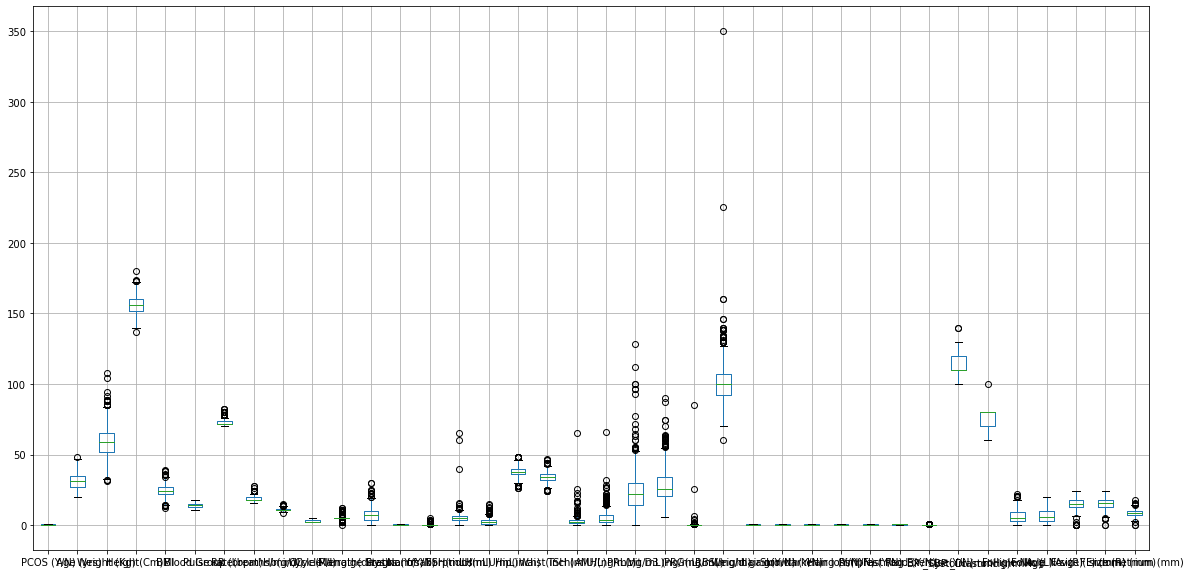

In [3]:
plt.figure(figsize =(20, 10))
data.boxplot()

In [4]:
data = pd.read_csv('data/cleaned_data.csv')
data.head()


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [5]:
data = data.dropna()
data.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
Hip(inch)                0
Waist(inch)              0
TSH (mIU/L)              0
AMH(ng/mL)               0
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)      0
BP _Diastolic (mmHg)     0
Follicle No. (L)         0
Follicle No. (R)         0
Avg. F size (L) (mm)     0
Avg. F size (R) (mm)     0
E

In [6]:
Q1 = np.percentile(data['FSH(mIU/mL)'],25)
Q2 = np.percentile(data['FSH(mIU/mL)'],50)
Q3 = np.percentile(data['FSH(mIU/mL)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['FSH(mIU/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['FSH(mIU/mL)'] = np.where(data['FSH(mIU/mL)']>up_lim, up_lim, data['FSH(mIU/mL)']) 
data['FSH(mIU/mL)'] = np.where(data['FSH(mIU/mL)']<low_lim, low_lim, data['FSH(mIU/mL)'])
outlier = []
for x in data['FSH(mIU/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 3.34
Q2= 4.86
Q3= 6.4
Interquartile range is 3.0600000000000005
low_limit is -1.2500000000000009
up_limit is 10.990000000000002
outlier in the dataset is [15.45, 11.12, 65.4, 12.28, 14.99, 60.37, 11.62, 40.08, 13.9, 11.96]
outlier in the dataset after capping is []


In [7]:
Q1 = np.percentile(data[' Age (yrs)'],25)
Q2 = np.percentile(data[' Age (yrs)'],50)
Q3 = np.percentile(data[' Age (yrs)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data[' Age (yrs)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data[' Age (yrs)'] = np.where(data[' Age (yrs)']>up_lim, up_lim, data[' Age (yrs)']) 
data[' Age (yrs)'] = np.where(data[' Age (yrs)']<low_lim, low_lim, data[' Age (yrs)'])
outlier = []
for x in data[' Age (yrs)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 27.0
Q2= 31.0
Q3= 35.0
Interquartile range is 8.0
low_limit is 15.0
up_limit is 47.0
outlier in the dataset is [48]
outlier in the dataset after capping is []


In [8]:
Q1 = np.percentile(data['Weight (Kg)'],25)
Q2 = np.percentile(data['Weight (Kg)'],50)
Q3 = np.percentile(data['Weight (Kg)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Weight (Kg)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Weight (Kg)'] = np.where(data['Weight (Kg)']>up_lim, up_lim, data['Weight (Kg)']) 
data['Weight (Kg)'] = np.where(data['Weight (Kg)']<low_lim, low_lim, data['Weight (Kg)'])
outlier = []
for x in data['Weight (Kg)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 52.0
Q2= 59.0
Q3= 65.0
Interquartile range is 13.0
low_limit is 32.5
up_limit is 84.5
outlier in the dataset is [85.0, 108.0, 91.4, 89.0, 85.0, 89.0, 88.0, 31.0, 104.0, 85.0, 32.0, 32.0, 85.0, 89.0, 85.0, 89.0, 94.0, 87.9]
outlier in the dataset after capping is []


In [9]:
Q1 = np.percentile(data['Height(Cm) '],25)
Q2 = np.percentile(data['Height(Cm) '],50)
Q3 = np.percentile(data['Height(Cm) '],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Height(Cm) ']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Height(Cm) '] = np.where(data['Height(Cm) ']>up_lim, up_lim, data['Height(Cm) ']) 
data['Height(Cm) '] = np.where(data['Height(Cm) ']<low_lim, low_lim, data['Height(Cm) '])
outlier = []
for x in data['Height(Cm) ']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 152.0
Q2= 156.0
Q3= 160.0
Interquartile range is 8.0
low_limit is 140.0
up_limit is 172.0
outlier in the dataset is [137.0, 180.0, 173.0, 173.0, 173.7, 173.0]
outlier in the dataset after capping is []


In [10]:
Q1 = np.percentile(data['BMI'],25)
Q2 = np.percentile(data['BMI'],50)
Q3 = np.percentile(data['BMI'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['BMI']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['BMI'] = np.where(data['BMI']>up_lim, up_lim, data['BMI']) 
data['BMI'] = np.where(data['BMI']<low_lim, low_lim, data['BMI'])
outlier = []
for x in data['BMI']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 21.83356196
Q2= 24.3
Q3= 26.7
Interquartile range is 4.8664380399999985
low_limit is 14.533904900000003
up_limit is 33.99965706
outlier in the dataset is [13.38796706, 35.69716021, 38.26530612, 38.5393827, 12.41788175, 38.47952593, 36.31082062, 13.49300051, 14.283241, 14.52432825, 13.85041551, 34.3, 38.9, 35.2]
outlier in the dataset after capping is []


In [11]:
Q1 = np.percentile(data['Pulse rate(bpm) '],25)
Q2 = np.percentile(data['Pulse rate(bpm) '],50)
Q3 = np.percentile(data['Pulse rate(bpm) '],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Pulse rate(bpm) ']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Pulse rate(bpm) '] = np.where(data['Pulse rate(bpm) ']>up_lim, up_lim, data['Pulse rate(bpm) ']) 
data['Pulse rate(bpm) '] = np.where(data['Pulse rate(bpm) ']<low_lim, low_lim, data['Pulse rate(bpm) '])
outlier = []
for x in data['Pulse rate(bpm) ']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 72.0
Q2= 72.0
Q3= 74.0
Interquartile range is 2.0
low_limit is 69.0
up_limit is 77.0
outlier in the dataset is [78, 78, 80, 80, 78, 80, 80, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 80, 78, 78, 80, 80, 80, 80, 78, 80, 78, 78, 80, 78, 78, 78, 78, 78, 80, 78, 78, 78, 80, 80, 78, 78, 82, 78, 80, 78, 78, 78, 78, 78, 78, 80, 80, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 80, 78, 78, 82, 80, 78, 78, 78, 80, 78, 78, 82, 80, 78, 80, 78, 78, 80, 80, 78, 78, 80, 80, 80, 80, 78, 78, 80]
outlier in the dataset after capping is []


In [12]:
Q1 = np.percentile(data['Hb(g/dl)'],25)
Q2 = np.percentile(data['Hb(g/dl)'],50)
Q3 = np.percentile(data['Hb(g/dl)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Hb(g/dl)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Hb(g/dl)'] = np.where(data['RR (breaths/min)']>up_lim, up_lim, data['Hb(g/dl)']) 
data['Hb(g/dl)'] = np.where(data['RR (breaths/min)']<low_lim, low_lim, data['Hb(g/dl)'])
outlier = []
for x in data['Hb(g/dl)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 10.5
Q2= 11.0
Q3= 11.7
Interquartile range is 1.1999999999999993
low_limit is 8.700000000000001
up_limit is 13.499999999999998
outlier in the dataset is [8.5, 13.8, 13.8, 14.2, 14.8, 13.8, 14.0, 14.0]
outlier in the dataset after capping is []


In [13]:
Q1 = np.percentile(data['Cycle length(days)'],25)
Q2 = np.percentile(data['Cycle length(days)'],50)
Q3 = np.percentile(data['Cycle length(days)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Cycle length(days)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Cycle length(days)'] = np.where(data['Cycle length(days)']>up_lim, up_lim, data['Cycle length(days)']) 
data['Cycle length(days)'] = np.where(data['Cycle length(days)']<low_lim, low_lim, data['Cycle length(days)'])
outlier = []
for x in data['Cycle length(days)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 5.0
Q2= 5.0
Q3= 5.0
Interquartile range is 0.0
low_limit is 5.0
up_limit is 5.0
outlier in the dataset is [2, 2, 7, 6, 9, 3, 3, 3, 4, 4, 7, 0, 9, 7, 3, 10, 4, 9, 2, 8, 12, 4, 11, 2, 9, 2, 11, 12, 11, 2, 9, 7, 8, 9, 11, 6, 2, 9, 9, 9, 2, 11, 2, 2, 4, 4, 4, 6, 4, 6, 4, 6, 6, 4, 6, 4, 6, 6, 4, 4, 4, 6, 4, 6, 6, 4, 4, 3, 4, 3, 6, 4, 6, 4, 6, 4, 4, 6, 3, 4, 6, 4, 4, 3, 6, 6, 6, 4, 4, 6, 6, 3, 3, 4, 6, 6, 6, 4, 4, 4, 3, 4, 6, 6, 6, 4, 4, 3, 6, 3, 4, 6, 6, 4, 4, 4, 3, 4, 6, 6, 3, 6, 6, 4, 6, 6, 4, 3, 6, 3, 2, 6, 6, 6, 3, 6, 2, 6, 6, 2, 6, 3, 6, 3, 3, 2, 2, 6, 3, 2, 6, 2, 6, 2, 6, 6, 2, 6, 3, 6, 6, 6, 6, 3, 6, 2, 6, 3, 6, 6, 3, 6, 4, 6, 3, 6, 6, 3, 6, 6, 7, 3, 6, 2, 2, 6, 6, 3, 6, 6, 4, 6, 6, 3, 6, 6, 6, 6, 4, 2, 6, 4, 6, 2, 3, 2, 6, 3, 6, 6, 6, 3, 2, 6, 3, 6, 7, 2, 7, 7, 2, 4, 6, 2, 4, 7, 7, 4, 4, 2, 7, 2, 4, 7, 2, 2, 2, 4, 7, 2, 4, 2, 4, 4, 4, 4, 7, 2, 7, 7, 4, 6, 6, 4, 7, 6, 2, 7]
outlier in the dataset after capping is []


In [14]:
Q1 = np.percentile(data['Marraige Status (Yrs)'],25)
Q2 = np.percentile(data['Marraige Status (Yrs)'],50)
Q3 = np.percentile(data['Marraige Status (Yrs)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Marraige Status (Yrs)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Marraige Status (Yrs)'] = np.where(data['Marraige Status (Yrs)']>up_lim, up_lim, data['Marraige Status (Yrs)']) 
data['Marraige Status (Yrs)'] = np.where(data['Marraige Status (Yrs)']<low_lim, low_lim, data['Marraige Status (Yrs)'])
outlier = []
for x in data['Marraige Status (Yrs)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 4.0
Q2= 7.0
Q3= 10.0
Interquartile range is 6.0
low_limit is -5.0
up_limit is 19.0
outlier in the dataset is [20.0, 22.0, 20.0, 30.0, 25.0, 24.0, 23.0, 23.0, 22.0, 30.0, 25.0]
outlier in the dataset after capping is []


In [15]:
Q1 = np.percentile(data['LH(mIU/mL)'],25)
Q2 = np.percentile(data['LH(mIU/mL)'],50)
Q3 = np.percentile(data['LH(mIU/mL)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['LH(mIU/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['LH(mIU/mL)'] = np.where(data['LH(mIU/mL)']>up_lim, up_lim, data['LH(mIU/mL)']) 
data['LH(mIU/mL)'] = np.where(data['No. of aborptions']<low_lim, low_lim, data['LH(mIU/mL)'])
outlier = []
for x in data['LH(mIU/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 1.03
Q2= 2.26
Q3= 3.67
Interquartile range is 2.6399999999999997
low_limit is -2.9299999999999997
up_limit is 7.629999999999999
outlier in the dataset is [9.17, 9.28, 8.45, 8.96, 14.69, 9.9, 10.75, 9.5, 12.95, 9.9, 8.34, 8.15, 7.85, 9.99, 8.17, 14.24, 7.89, 9.87, 8.71, 8.34, 12.04, 10.5, 9.38]
outlier in the dataset after capping is []


In [16]:
Q1 = np.percentile(data['Hip(inch)'],25)
Q2 = np.percentile(data['Hip(inch)'],50)
Q3 = np.percentile(data['Hip(inch)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Hip(inch)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Hip(inch)'] = np.where(data['Hip(inch)']>up_lim, up_lim, data['Hip(inch)']) 
data['Hip(inch)'] = np.where(data['Hip(inch)']<low_lim, low_lim, data['Hip(inch)'])
outlier = []
for x in data['Hip(inch)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 36.0
Q2= 38.0
Q3= 40.0
Interquartile range is 4.0
low_limit is 30.0
up_limit is 46.0
outlier in the dataset is [48, 48, 28, 28, 26, 48, 28, 28, 28, 28, 28, 26, 48, 28, 26, 48, 28, 48, 28, 28, 48]
outlier in the dataset after capping is []


In [17]:
Q1 = np.percentile(data['Waist(inch)'],25)
Q2 = np.percentile(data['Waist(inch)'],50)
Q3 = np.percentile(data['Waist(inch)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Waist(inch)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Waist(inch)'] = np.where(data['Waist(inch)']>up_lim, up_lim, data['Waist(inch)']) 
data['Waist(inch)'] = np.where(data['Waist(inch)']<low_lim, low_lim, data['Waist(inch)'])
outlier = []
for x in data['Waist(inch)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 32.0
Q2= 34.0
Q3= 36.0
Interquartile range is 4.0
low_limit is 26.0
up_limit is 42.0
outlier in the dataset is [44, 25, 24, 25, 47, 44, 24, 24, 43, 44, 25, 46, 25, 24, 44, 44, 46]
outlier in the dataset after capping is []


In [18]:
Q1 = np.percentile(data['TSH (mIU/L)'],25)
Q2 = np.percentile(data['TSH (mIU/L)'],50)
Q3 = np.percentile(data['TSH (mIU/L)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['TSH (mIU/L)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['TSH (mIU/L)'] = np.where(data['TSH (mIU/L)']>up_lim, up_lim, data['TSH (mIU/L)']) 
data['TSH (mIU/L)'] = np.where(data['TSH (mIU/L)']<low_lim, low_lim, data['TSH (mIU/L)'])
outlier = []
for x in data['TSH (mIU/L)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 1.47
Q2= 2.26
Q3= 3.57
Interquartile range is 2.0999999999999996
low_limit is -1.6799999999999995
up_limit is 6.719999999999999
outlier in the dataset is [16.41, 12.18, 8.39, 65.0, 9.03, 6.81, 15.68, 10.89, 16.99, 6.95, 10.22, 25.91, 10.96, 22.59, 7.02, 7.27, 20.85, 6.91, 6.75, 6.75, 6.91, 6.96, 8.3, 8.47, 17.2]
outlier in the dataset after capping is []


In [19]:
Q1 = np.percentile(data['PRL(ng/mL)'],25)
Q2 = np.percentile(data['PRL(ng/mL)'],50)
Q3 = np.percentile(data['PRL(ng/mL)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['PRL(ng/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['PRL(ng/mL)'] = np.where(data['PRL(ng/mL)']>up_lim, up_lim, data['PRL(ng/mL)']) 
data['PRL(ng/mL)'] = np.where(data['PRL(ng/mL)']<low_lim, low_lim, data['PRL(ng/mL)'])
outlier = []
for x in data['PRL(ng/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 14.52
Q2= 21.92
Q3= 29.97
Interquartile range is 15.45
low_limit is -8.654999999999998
up_limit is 53.144999999999996
outlier in the dataset is [92.65, 54.09, 55.2, 54.32, 55.47, 77.32, 60.2, 111.74, 128.24, 96.63, 53.39, 63.3, 54.88, 99.93, 99.93, 71.77, 67.97, 64.47, 60.4, 54.86, 96.41]
outlier in the dataset after capping is []


In [20]:
Q1 = np.percentile(data['Vit D3 (ng/mL)'],25)
Q2 = np.percentile(data['Vit D3 (ng/mL)'],50)
Q3 = np.percentile(data['Vit D3 (ng/mL)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Vit D3 (ng/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Vit D3 (ng/mL)'] = np.where(data['Vit D3 (ng/mL)']>up_lim, up_lim, data['Vit D3 (ng/mL)']) 
data['Vit D3 (ng/mL)'] = np.where(data['Vit D3 (ng/mL)']<low_lim, low_lim, data['Vit D3 (ng/mL)'])
outlier = []
for x in data['Vit D3 (ng/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 20.7
Q2= 25.9
Q3= 34.4
Interquartile range is 13.7
low_limit is 0.15000000000000213
up_limit is 54.949999999999996
outlier in the dataset is [61.3, 56.2, 56.2, 64.2, 56.25, 56.25, 56.45, 55.9, 70.53, 56.3, 56.2, 56.9, 60.2, 74.5, 63.3, 57.08, 61.58, 55.6, 62.0, 63.1, 87.2, 90.0, 57.7, 74.5, 61.3, 58.32, 62.5, 60.265]
outlier in the dataset after capping is []


In [21]:
Q1 = np.percentile(data['PRG(ng/mL)'],25)
Q2 = np.percentile(data['PRG(ng/mL)'],50)
Q3 = np.percentile(data['PRG(ng/mL)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['PRG(ng/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['PRG(ng/mL)'] = np.where(data['PRG(ng/mL)']>up_lim, up_lim, data['PRG(ng/mL)']) 
data['PRG(ng/mL)'] = np.where(data['PRG(ng/mL)']<low_lim, low_lim, data['PRG(ng/mL)'])
outlier = []
for x in data['PRG(ng/mL)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 0.25
Q2= 0.32
Q3= 0.46
Interquartile range is 0.21000000000000002
low_limit is -0.06500000000000006
up_limit is 0.7750000000000001
outlier in the dataset is [0.97, 0.98, 0.98, 1.2, 0.88, 85.0, 0.81, 3.66, 1.22, 0.79, 0.98, 0.98, 1.0, 0.93, 6.39, 0.93, 0.91, 0.98, 1.26, 0.9, 1.0, 0.89, 0.79, 0.9, 0.79, 1.1, 0.94, 0.78, 0.89, 0.79, 1.24, 1.0, 0.79, 4.25, 0.8, 0.86, 25.3]
outlier in the dataset after capping is []


In [22]:
Q1 = np.percentile(data['RBS(mg/dl)'],25)
Q2 = np.percentile(data['RBS(mg/dl)'],50)
Q3 = np.percentile(data['RBS(mg/dl)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['RBS(mg/dl)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['RBS(mg/dl)'] = np.where(data['RBS(mg/dl)']>up_lim, up_lim, data['RBS(mg/dl)']) 
data['RBS(mg/dl)'] = np.where(data['PRG(ng/mL)']<low_lim, low_lim, data['RBS(mg/dl)'])
outlier = []
for x in data['RBS(mg/dl)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 92.0
Q2= 100.0
Q3= 107.0
Interquartile range is 15.0
low_limit is 69.5
up_limit is 129.5
outlier in the dataset is [138.0, 130.0, 133.0, 133.0, 134.0, 60.0, 131.0, 130.0, 160.0, 350.0, 133.0, 138.0, 140.0, 133.0, 160.0, 146.0, 138.0, 135.0, 130.0, 138.0, 130.0, 130.0, 130.0, 146.0, 225.0, 130.0, 133.0, 140.0, 138.0, 140.0]
outlier in the dataset after capping is []


In [23]:
Q1 = np.percentile(data['BP _Systolic (mmHg)'],25)
Q2 = np.percentile(data['BP _Systolic (mmHg)'],50)
Q3 = np.percentile(data['BP _Systolic (mmHg)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['BP _Systolic (mmHg)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['BP _Systolic (mmHg)'] = np.where(data['BP _Systolic (mmHg)']>up_lim, up_lim, data['BP _Systolic (mmHg)']) 
data['BP _Systolic (mmHg)'] = np.where(data['BP _Systolic (mmHg)']<low_lim, low_lim, data['BP _Systolic (mmHg)'])
outlier = []
for x in data['BP _Systolic (mmHg)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 110.0
Q2= 110.0
Q3= 120.0
Interquartile range is 10.0
low_limit is 95.0
up_limit is 135.0
outlier in the dataset is [140, 140]
outlier in the dataset after capping is []


In [24]:
Q1 = np.percentile(data['BP _Diastolic (mmHg)'],25)
Q2 = np.percentile(data['BP _Diastolic (mmHg)'],50)
Q3 = np.percentile(data['BP _Diastolic (mmHg)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['BP _Diastolic (mmHg)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['BP _Diastolic (mmHg)'] = np.where(data['BP _Diastolic (mmHg)']>up_lim, up_lim, data['BP _Diastolic (mmHg)']) 
data['BP _Diastolic (mmHg)'] = np.where(data['BP _Diastolic (mmHg)']<low_lim, low_lim, data['BP _Diastolic (mmHg)'])
outlier = []
for x in data['BP _Diastolic (mmHg)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 70.0
Q2= 80.0
Q3= 80.0
Interquartile range is 10.0
low_limit is 55.0
up_limit is 95.0
outlier in the dataset is [100]
outlier in the dataset after capping is []


In [25]:
Q1 = np.percentile(data['Follicle No. (L)'],25)
Q2 = np.percentile(data['Follicle No. (L)'],50)
Q3 = np.percentile(data['Follicle No. (L)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Follicle No. (L)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Follicle No. (L)'] = np.where(data['Follicle No. (L)']>up_lim, up_lim, data['Follicle No. (L)']) 
data['Follicle No. (L)'] = np.where(data['Follicle No. (L)']<low_lim, low_lim, data['Follicle No. (L)'])
outlier = []
for x in data['Follicle No. (L)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 3.0
Q2= 5.0
Q3= 9.0
Interquartile range is 6.0
low_limit is -6.0
up_limit is 18.0
outlier in the dataset is [21, 22, 21, 20, 21, 20]
outlier in the dataset after capping is []


In [26]:
Q1 = np.percentile(data['Avg. F size (L) (mm)'],25)
Q2 = np.percentile(data['Avg. F size (L) (mm)'],50)
Q3 = np.percentile(data['Avg. F size (L) (mm)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Avg. F size (L) (mm)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Avg. F size (L) (mm)'] = np.where(data['Avg. F size (L) (mm)']>up_lim, up_lim, data['Avg. F size (L) (mm)']) 
data['Avg. F size (L) (mm)'] = np.where(data['Avg. F size (L) (mm)']<low_lim, low_lim, data['Avg. F size (L) (mm)'])
outlier = []
for x in data['Avg. F size (L) (mm)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 13.0
Q2= 15.0
Q3= 18.0
Interquartile range is 5.0
low_limit is 5.5
up_limit is 25.5
outlier in the dataset is [0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]
outlier in the dataset after capping is []


In [27]:
Q1 = np.percentile(data['Avg. F size (R) (mm)'],25)
Q2 = np.percentile(data['Avg. F size (R) (mm)'],50)
Q3 = np.percentile(data['Avg. F size (R) (mm)'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in data['Avg. F size (R) (mm)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
data['Avg. F size (R) (mm)'] = np.where(data['Avg. F size (R) (mm)']>up_lim, up_lim, data['Avg. F size (R) (mm)']) 
data['Avg. F size (R) (mm)'] = np.where(data['Avg. F size (R) (mm)']<low_lim, low_lim, data['Avg. F size (R) (mm)'])
outlier = []
for x in data['Avg. F size (R) (mm)']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 13.0
Q2= 16.0
Q3= 18.0
Interquartile range is 5.0
low_limit is 5.5
up_limit is 25.5
outlier in the dataset is [5.0, 4.7, 4.5, 0.0, 0.17]
outlier in the dataset after capping is []


In [28]:
#data.to_csv('data/cleaned_data1.csv', mode='a', header=True, index = False)

<AxesSubplot:>

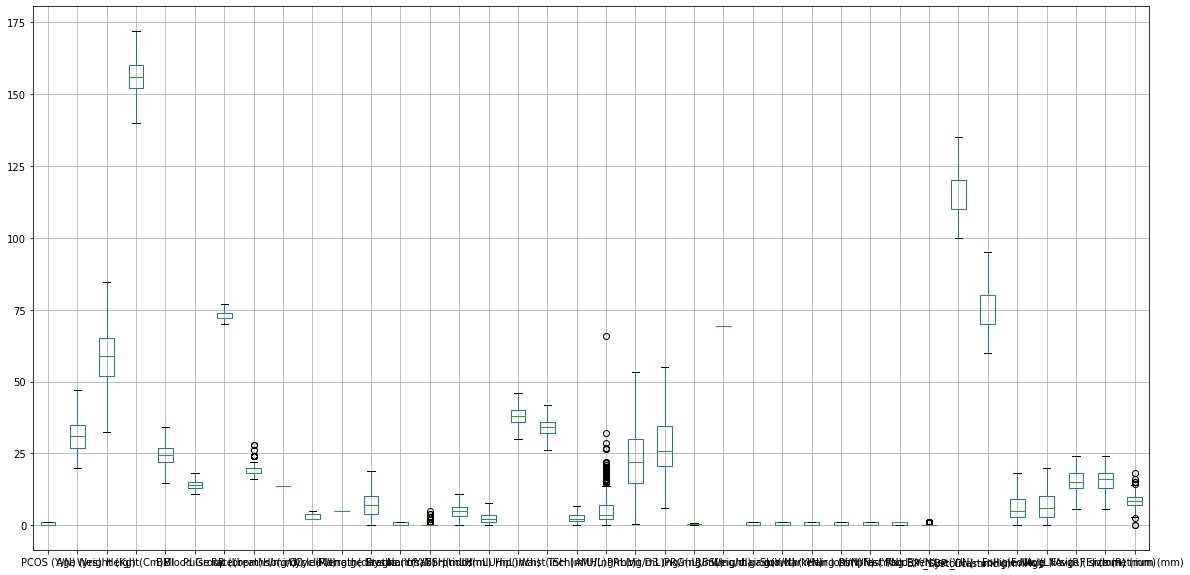

In [29]:
plt.figure(figsize =(20, 10))
data.boxplot()

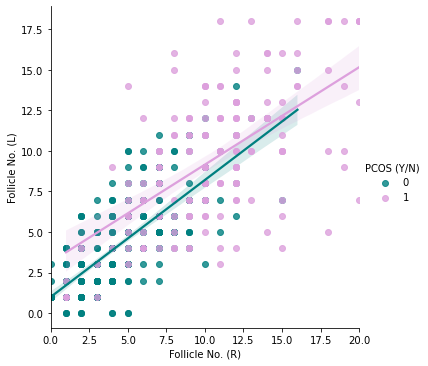

In [31]:
import seaborn as sns
color = ["teal", "plum"]
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()